<a href="https://colab.research.google.com/github/katiegaertner/Digit-Recognizer/blob/main/DigitRecognizerFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import f1_score

In [2]:
!wget https://github.com/katiegaertner/Digit-Recognizer/archive/refs/heads/main.zip

--2022-02-14 01:02:22--  https://github.com/katiegaertner/Digit-Recognizer/archive/refs/heads/main.zip
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/katiegaertner/Digit-Recognizer/zip/refs/heads/main [following]
--2022-02-14 01:02:22--  https://codeload.github.com/katiegaertner/Digit-Recognizer/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.121.9
Connecting to codeload.github.com (codeload.github.com)|140.82.121.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘main.zip’

main.zip                [    <=>             ]  15.25M  20.2MB/s    in 0.8s    

2022-02-14 01:02:23 (20.2 MB/s) - ‘main.zip’ saved [15992142]



In [3]:
!unzip "/content/main.zip" -d "/content/output_folder/"

Archive:  /content/main.zip
73504bf185e47ba0c5ae32a3b6f8eb30c2e93b57
   creating: /content/output_folder/Digit-Recognizer-main/
 extracting: /content/output_folder/Digit-Recognizer-main/test.csv.zip  
 extracting: /content/output_folder/Digit-Recognizer-main/train.csv.zip  


In [4]:
!unzip "/content/output_folder/Digit-Recognizer-main/test.csv.zip" -d "/content/output_folder/Digit-Recognizer-main/csvs"

Archive:  /content/output_folder/Digit-Recognizer-main/test.csv.zip
  inflating: /content/output_folder/Digit-Recognizer-main/csvs/test.csv  


In [5]:
!unzip "/content/output_folder/Digit-Recognizer-main/train.csv.zip" -d "/content/output_folder/Digit-Recognizer-main/csvs"

Archive:  /content/output_folder/Digit-Recognizer-main/train.csv.zip
  inflating: /content/output_folder/Digit-Recognizer-main/csvs/train.csv  


In [6]:
test = pd.read_csv('/content/output_folder/Digit-Recognizer-main/test.csv.zip')
xtest = test

In [7]:
train = pd.read_csv('/content/output_folder/Digit-Recognizer-main/train.csv.zip')
ytrain = train['label']
xtrain = train.drop(['label'], axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


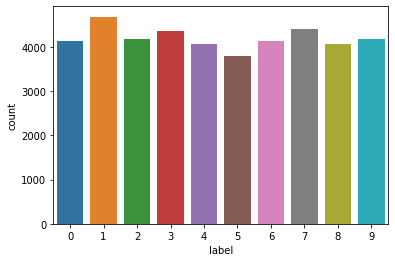

In [8]:
train['label'].value_counts()
sns.countplot('label', data=train) 

In [9]:
print(xtrain.max(numeric_only=True).max())
print(xtrain.min(numeric_only=True).max())

255
0


In [10]:
#Normalize Data
xtrain = xtrain/255.0

In [11]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


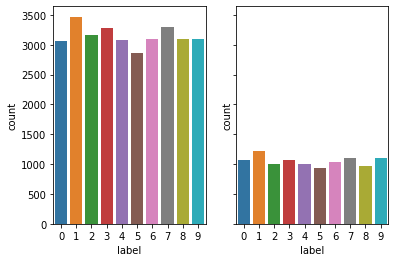

In [12]:
#verify train and test data are balanced data sets

y1_train = pd.DataFrame(y1_train)
y1_train.value_counts()

y1_test = pd.DataFrame(y1_test)
y1_test.value_counts()

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)

sns.countplot('label', data=y1_train, ax=ax1) 
sns.countplot('label', data=y1_test, ax=ax2)

# Objective 1: Random Forest
## Fit a random forest classifier using the full set of explanatory variables and the model training set (csv)

In [13]:
#import classifer
from sklearn.ensemble import RandomForestClassifier

#start time
rf_start=datetime.now()

#instantiate the estimator
rfc = RandomForestClassifier()

#fit the model with the training data
rfc.fit(x1_train, y1_train)

#end time
rf_end=datetime.now()
#print total run time
print("Total Random Forest Run Time:", rf_end-rf_start)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


Total Random Forest Run Time: 0:00:17.923783


In [14]:
#Evaluate Initial Model

def confusion_matrix(model, x, y, title):
  y_pred=model.predict(x)
  cnf_matrix = metrics.confusion_matrix(y, y_pred)
  class_names=[0,1] # name  of classes
  fig, ax = plt.subplots()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names)
  plt.yticks(tick_marks, class_names)
  sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
  ax.xaxis.set_label_position("top")
  plt.tight_layout()
  plt.title(title, y=1.1)
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

def model_metrics(model, xtest, ytest):
  y_pred = model.predict(xtest)
  cnf_matrix = metrics.confusion_matrix(ytest, y_pred)
  print(model)
  print("Accuracy:",metrics.accuracy_score(ytest, y_pred))
  print("  Compare with Null Accuracy:", ytest.value_counts().head(1) / len(ytest))

model_metrics(rfc, x1_test, y1_test)

RandomForestClassifier()
Accuracy: 0.9635238095238096
  Compare with Null Accuracy: label
1        0.115714
dtype: float64


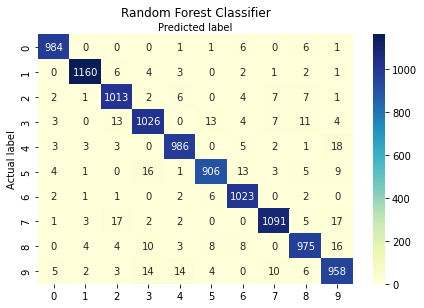

In [36]:
confusion_matrix(rfc, x1_test, y1_test, 'Random Forest Classifier')

In [37]:
from sklearn.model_selection import RandomizedSearchCV

#specify hyperparameter distributions
nest_range = list(range(25, 100, 10))
max_features_range = list(range(1,200, 25))
max_depth_range = list(range(1, 25, 5))
splitting_criteria_range = ['gini', 'entropy']

param_dist = dict(n_estimators=nest_range, max_features=max_features_range, max_depth=max_depth_range, criterion=splitting_criteria_range)

#Randomized Hyperparameter Search
rand = RandomizedSearchCV(rfc, param_dist, cv=10, scoring='accuracy', n_iter=10)
rand.fit(x1_train, y1_train)

In [38]:
# examine the best model
print(rand.best_score_)
print(rand.best_params_)

In [183]:
# run the best model
bestrfc = RandomForestClassifier(n_estimators=85, max_features=76, max_depth=16, criterion='entropy')
bestrfc.fit(x1_train, y1_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(criterion='entropy', max_depth=16, max_features=76,
                       n_estimators=85)

In [40]:
model_metrics(bestrfc, x1_test, y1_test)

RandomForestClassifier(criterion='entropy', max_depth=16, max_features=76,
                       n_estimators=85)
Accuracy: 0.9616190476190476
  Compare with Null Accuracy: label
1        0.112286
dtype: float64


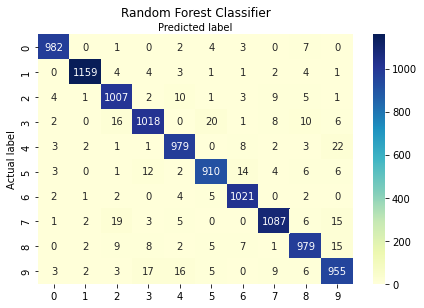

In [41]:
#Evaluate bestRFC model
confusion_matrix(bestrfc, x1_test, y1_test, 'Random Forest Classifier')

In [184]:
#output and format best model predictions for Kaggle
test_predictions = bestrfc.predict(xtest)
predict_rfc = pd.DataFrame(test_predictions)
predict_rfc.index.rename('ImageID', inplace=True)
predict_rfc.columns =['Label']
predict_rfc.index += 1

In [185]:
from google.colab import drive
drive.mount('/drive')
predict_rfc.to_csv('/drive/My Drive/GaertnerRFC_MNISTprediction.csv')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


# Objective 2: Principal Component Analysis (PCA)
## Execute principal components analysis (PCA) on the combined training and test set data together, generating principal components that represent 95 percent of the variability in the explanatory variables.

In [15]:
from sklearn.decomposition import PCA

#start time
pca_start=datetime.now()

#pca analysis
pca = PCA(0.95)
pca.fit(x1_train)

#end time
pca_end=datetime.now()
#print total run time
print("Total Principal Component Run Time:", pca_end-pca_start)
print("Total Principal Components:", pca.n_components_)

Total Principal Component Run Time: 0:00:05.076477
Total Principal Components: 153


In [16]:
pca_train = pca.transform(x1_train)
pca_test = pca.transform(x1_test)

# Objective 3: Random Forest Classifier with PCA
##Using the identified principal components from step (2), use thecsvto build another random forest classifier.

In [17]:
#Run Random Forest Classifier on PCA-reduced data set
rfpca_start=datetime.now()

#fit the model with the training data
rfc.fit(pca_train, y1_train)

#end time
rfpca_end=datetime.now()
#print total run time
print("Total Random Forest with PCA-reduction Run Time:", rfpca_end-rfpca_start)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Total Random Forest with PCA-reduction Run Time: 0:00:43.216222


In [18]:
#Evaluate Random Forest PCA-reduced model
model_metrics(rfc, pca_test, y1_test)

RandomForestClassifier()
Accuracy: 0.9380952380952381
  Compare with Null Accuracy: label
1        0.115714
dtype: float64


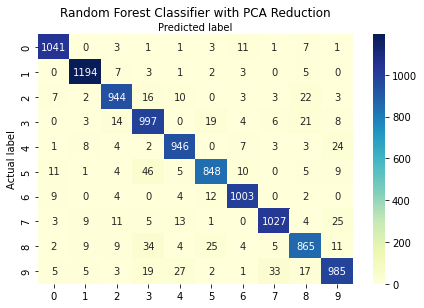

In [19]:
confusion_matrix(rfc, pca_test, y1_test, 'Random Forest Classifier with PCA Reduction')

In [186]:
#output and format best model predictions for Kaggle
pca_kaggletest = pca.transform(xtest)
test_predictions = rfc.predict(pca_kaggletest)
predict_rfc = pd.DataFrame(test_predictions)
predict_rfc.index.rename('ImageID', inplace=True)
predict_rfc.columns =['Label']
predict_rfc.index += 1

In [187]:
predict_rfc.to_csv('/drive/My Drive/GaertnerRFCPCA_MNISTprediction.csv')

# Objective 4: K-means Clustering
##Use k-means clustering to group MNIST observations into 1 of 10 categories and then assign labels.

In [152]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import accuracy_score

#Initialize K-means model
#k = len(np.unique(ytrain))
k=150
kmeans = MiniBatchKMeans(n_clusters = k)

#fit the model
kmeans.fit(xtrain)

#return labels
print(kmeans.labels_)

[ 92 149  66 ...  89 127  59]


In [156]:
labels = pd.DataFrame(ytrain)
labels['cluster'] = kmeans.labels_
labelkey = labels.groupby('cluster', as_index=False).agg({'label': lambda x: x.mode()})
labelkey = labelkey.rename(columns={'label':'predicted_label'})

labels2 = labels.merge(labelkey, on='cluster', how='left', sort=False)
labels2.head()

,label,cluster,predicted_label
0,1,92,1
1,0,149,0
2,1,66,1
3,4,100,2
4,0,149,0


In [157]:
print("Accuracy: ", accuracy_score(labels2['predicted_label'], labels2['label']))
print("Inertia: ", kmeans.inertia_)

Accuracy:  0.8784285714285714
Inertia:  1129000.7099797847


In [188]:
#output and format best model predictions for Kaggle

#fit to test data
#kmeans.fit(xtest)

#create prediction
predictlabels = pd.DataFrame(kmeans.labels_)
predictlabels = predictlabels.rename(columns={0:'cluster'})

predict_kmeans = predictlabels.merge(labelkey, on='cluster', how='left', sort=False)
predict_kmeans.index.rename('ImageID', inplace=True)
predict_kmeansfinal = predict_kmeans.drop ('cluster', axis=1)
predict_kmeansfinal.columns =['Label']
predict_kmeansfinal.index += 1

In [189]:
predict_kmeansfinal.to_csv('/drive/My Drive/GaertnerKMEANS_MNISTprediction.csv')